In [1]:
import feature_extraction
import random
import tensorflow as tf
import os
import pandas as pd
from PIL import Image
import numpy as np


IMG_SIZE = (256, 256)
vectors_from_single_word=100


In [2]:
word_vec_dictionary=feature_extraction.get_wordEmbeddingDictionary()
all_classes= list(word_vec_dictionary.keys())
#seen_keys= random.choices(all_classes,k=20)
#unseen_keys= list(set(all_classes).difference(seen_keys))
seen_keys=feature_extraction.get_entities_in_file_line("trainclasses.txt")
unseen_keys=feature_extraction.get_entities_in_file_line("testclasses.txt")
print(seen_keys)
print(unseen_keys)


['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian', 'horse', 'german+shepherd', 'blue+whale', 'siamese+cat', 'skunk', 'mole', 'tiger', 'moose', 'spider+monkey', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'weasel', 'otter', 'buffalo', 'zebra', 'deer', 'bobcat', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus', 'cow', 'dolphin']
['chimpanzee', 'giant+panda', 'leopard', 'persian+cat', 'pig', 'hippopotamus', 'humpback+whale', 'raccoon', 'rat', 'seal']


In [3]:
min_class= 10000
for key in seen_keys:
    files = os.listdir("JPEGImages\\"+key)
    print(key+":"+str(len(files)))
    if(len(files)<min_class):
        min_class=len(files)
print(min_class)




antelope:1046
grizzly+bear:852
killer+whale:291
beaver:193
dalmatian:549
horse:1645
german+shepherd:1033
blue+whale:174
siamese+cat:500
skunk:188
mole:100
tiger:877
moose:704
spider+monkey:291
elephant:1038
gorilla:872
ox:728
fox:664
sheep:1420
hamster:779
squirrel:1200
rhinoceros:696
rabbit:1088
bat:383
giraffe:1202
wolf:589
chihuahua:567
weasel:272
otter:758
buffalo:895
zebra:1170
deer:1344
bobcat:630
lion:1019
mouse:185
polar+bear:868
collie:1028
walrus:215
cow:1338
dolphin:946
100


In [4]:
feature_extractor_model=feature_extraction.instantiate_model()
IDs=[]
Feature_vectors=[]
feature_extracting_batch_size=16
for key in seen_keys:
    files = os.listdir("JPEGImages\\"+key)
    #input_arr= np.array()
    input_arr=[]
    batch_counter=0
    min_counter=0
    for file in files:
        batch_counter+=1
        min_counter+=1
        id= all_classes.index(key)
        IDs.append(id)
        image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+key+"\\"+file,grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
        input=tf.keras.preprocessing.image.img_to_array(image)
        input=input/255.0
        input_arr.append(input)
        if(batch_counter%feature_extracting_batch_size==0):
            input_model= np.array(input_arr)
            features= feature_extractor_model.predict(input_model)
            for vector in features:
                Feature_vectors.append(vector)

            batch_counter=0
            input_arr=[]
        if(min_counter==min_class):
            break
    if(len(input_arr)>0):
        input_model= np.array(input_arr)
        features= feature_extractor_model.predict(input_model)
        for vector in features:
            Feature_vectors.append(vector)  
    print(key)
    





1/1 [==============================] - 0s 82ms/step
antelope
1/1 [==============================] - 0s 30ms/step
grizzly+bear
1/1 [==============================] - 0s 27ms/step
killer+whale
1/1 [==============================] - 0s 27ms/step
beaver
1/1 [==============================] - 0s 26ms/step
dalmatian
1/1 [==============================] - 0s 33ms/step
horse
1/1 [==============================] - 0s 27ms/step
german+shepherd
1/1 [==============================] - 0s 28ms/step
blue+whale
1/1 [==============================] - 0s 28ms/step
siamese+cat
1/1 [==============================] - 0s 26ms/step
skunk
1/1 [==============================] - 0s 26ms/step
mole
1/1 [==============================] - 0s 26ms/step
tiger
1/1 [==============================] - 0s 34ms/step
moose
1/1 [==============================] - 0s 31ms/step
spider+monkey
1/1 [==============================] - 0s 28ms/step
elephant
1/1 [==============================] - 0s 32ms/step
gorilla
1/1 [============

In [5]:
print(len(IDs))
print(len(Feature_vectors))

4000
4000


In [6]:
ontologyIDsAllClasses=[]
ontology_vectors_and_noiseAllClasses=[]
for i in range(vectors_from_single_word):
    for key, vector in word_vec_dictionary.items():
        id= all_classes.index(key)
        s= np.random.normal(0,1,100)
        datasample= np.concatenate((vector,s),axis=0)
        ontologyIDsAllClasses.append(id)
        ontology_vectors_and_noiseAllClasses.append(datasample)
ontologyIDsSeen=[]
ontology_vectors_and_noiseSeen=[]
for i in range(vectors_from_single_word):
    for key in seen_keys:
        id= all_classes.index(key)
        s= np.random.normal(0,1,100)
        vector= word_vec_dictionary[key]
        datasample= np.concatenate((vector,s),axis=0)
        ontologyIDsSeen.append(id)
        ontology_vectors_and_noiseSeen.append(datasample)
ontology_vectors_and_noiseAllClasses= np.array(ontology_vectors_and_noiseAllClasses)            
ontology_vectors_and_noiseSeen= np.array(ontology_vectors_and_noiseSeen)       
print(ontology_vectors_and_noiseSeen.shape) 
    

(4000, 200)


In [7]:
# Feature_vectors= np.array(Feature_vectors)
# Feature_vectors_shuffled= np.copy(Feature_vectors)
# np.random.shuffle(Feature_vectors_shuffled)

# ontology_vectors_and_noiseSeen_shuffled= np.copy(ontology_vectors_and_noiseSeen) 
# np.random.shuffle(ontology_vectors_and_noiseSeen_shuffled)

from sklearn.model_selection import train_test_split

x =np.array( Feature_vectors)
y= np.array(IDs)

x_train,x_test,y_train, y_test= train_test_split(x, y,test_size=0.20,random_state=42)

classifier_to_gan_training=feature_extraction.classifier_model(len(all_classes))
classifier_to_gan_training.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


In [8]:
r_gan_training=classifier_to_gan_training.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 1.0926 - accuracy: 0.7394 - val_loss: 0.7064 - val_accuracy: 0.8263
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2352 - accuracy: 0.9347 - val_loss: 0.6160 - val_accuracy: 0.8475
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.9791 - val_loss: 0.5893 - val_accuracy: 0.8587
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9969 - val_loss: 0.5820 - val_accuracy: 0.8700
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.5901 - val_accuracy: 0.8712
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.6014 - val_accuracy: 0.8687
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6170 - val_accuracy: 0.8700
Epoch 

In [9]:
#image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+"bat"+"\\"+"bat_10001.jpg",grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+"deer"+"\\"+"deer_10001.jpg",grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
#image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+"dolphin"+"\\"+"dolphin_10001.jpg",grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
input=tf.keras.preprocessing.image.img_to_array(image)
input=input/255.0
features=feature_extractor_model.predict(np.array([input]))
result=classifier_to_gan_training.predict(features)
predicted= np.argmax( result[0])

print(all_classes[predicted])

1/1 [==============================] - 0s 32ms/step
deer


In [10]:
import gan

#Feature_vectors= np.array(Feature_vectors)
#np.random.shuffle(Feature_vectors)

#np.random.shuffle(ontology_vectors_and_noiseSeen)
generator= gan.make_generator_model()

noise= tf.random.normal([1,200])
#print(ontology_vectors_and_noiseSeen.shape)

generated_feature= generator(noise,training=False)
print(generated_feature)

tf.Tensor(
[[ 0.70596576  0.01425487  0.41676167 ...  0.52907157 -0.16201597
  -0.0693375 ]], shape=(1, 2048), dtype=float32)


In [11]:
from sklearn.utils import shuffle
x =np.array( ontology_vectors_and_noiseSeen)
y= np.array(ontologyIDsSeen)
print(x.shape)
print(y.shape)
x_train,y_train= shuffle(x, y,random_state=42)

y_train_one_hot=np.zeros((y_train.shape[0],len(all_classes)))
for i in range(y_train.shape[0]):
    y_train_one_hot[i][y_train[i]]=1
print(y_train_one_hot[1])

(4000, 200)
(4000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0.]


In [12]:
batch_size=25

x_train_batches=np.split(x_train,min_class/batch_size*len(seen_keys),axis=0)
x_train_batches=np.array(x_train_batches)
print(x_train_batches.shape)
print(x_train_batches[0])

y_train_batches=np.split(y_train,min_class/batch_size*len(seen_keys),axis=0)
y_train_batches=np.array(y_train_batches)
print(y_train_batches.shape)
print(y_train_batches[0])

(160, 25, 200)
[[ 1.16104232e-02  2.58983169e-02 -7.58273602e-02 ...  1.85198660e+00
   1.69078851e+00 -2.06953152e+00]
 [-7.76864402e-03  9.46427062e-02 -5.36035150e-02 ... -6.65574259e-01
   8.23707788e-01 -5.89089867e-01]
 [-1.83903500e-01 -7.60788992e-02 -1.31168157e-01 ...  2.06331298e+00
   2.47158483e-02  6.73787196e-01]
 ...
 [ 6.02792539e-02 -6.13302775e-02 -9.85605791e-02 ...  5.81791899e-01
  -1.24180038e+00  5.80003563e-01]
 [-1.01104319e-01  2.26372585e-01 -9.65239853e-02 ... -9.39438233e-01
   8.51546344e-01 -1.04317808e+00]
 [ 7.22626001e-02 -4.53455299e-02 -9.24092904e-02 ... -1.10870497e+00
  -7.07931468e-04 -2.25692588e-01]]
(160, 25)
[34 45  3 22  5 49  8 45  8  2 42  8  6 40 40 24 48 11 29 19 14 29 49  1
 44]


In [13]:
# batch_size=25

# print(Feature_vectors_shuffled.shape)
# Feature_vectors_shuffled=np.reshape(Feature_vectors_shuffled,(Feature_vectors.shape[0],2048))
# #Feature_vectors.reshape((1170,2048))
# print(Feature_vectors_shuffled.shape)
# Feature_vectors_batches= np.split(Feature_vectors_shuffled,min_class/batch_size*len(seen_keys),axis=0)
# Feature_vectors_batches=np.array(Feature_vectors_batches)
# print(Feature_vectors_batches.shape)

# ontology_vectors_and_noiseSeen_batches=np.split(ontology_vectors_and_noiseSeen_shuffled,min_class/batch_size*len(seen_keys),axis=0)
# ontology_vectors_and_noiseSeen_batches=np.array(ontology_vectors_and_noiseSeen_batches)
# print(ontology_vectors_and_noiseSeen_batches.shape)
# print(ontology_vectors_and_noiseSeen_batches[0])

In [14]:
# discriminator = gan.make_discriminator_model()
# decision= discriminator(generated_feature)
# print(decision)

In [15]:
generator_optimizer=tf.keras.optimizers.Adam(5e-5)
#discriminator_optimizer=tf.keras.optimizers.Adam(5e-5)

In [16]:
checkpoint_dir='./training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
#checkpoint= tf.train.Checkpoint(generator_optimizer=generator_optimizer, discriminator_optimizer=discriminator_optimizer,generator=generator,discriminator=discriminator)
checkpoint= tf.train.Checkpoint(generator_optimizer=generator_optimizer, generator=generator)

In [17]:
EPOCHS = 100
#gan.train(Feature_vectors_batches,ontology_vectors_and_noiseSeen_batches,EPOCHS,generator,discriminator,generator_optimizer,discriminator_optimizer,checkpoint,checkpoint_prefix)
gan.train(x_train_batches,EPOCHS,generator,classifier_to_gan_training,y_train_batches,generator_optimizer,checkpoint,checkpoint_prefix)

Time for epoch 1 is 0.646259069442749 sec
Generator loss: 2.780512809753418 
Time for epoch 2 is 0.43832921981811523 sec
Generator loss: 0.9646649360656738 
Time for epoch 3 is 0.4600410461425781 sec
Generator loss: 0.31905949115753174 
Time for epoch 4 is 0.44209980964660645 sec
Generator loss: 0.1345648169517517 
Time for epoch 5 is 0.41109299659729004 sec
Generator loss: 0.07282385230064392 
Time for epoch 6 is 0.3920888900756836 sec
Generator loss: 0.046758413314819336 
Time for epoch 7 is 0.3920884132385254 sec
Generator loss: 0.03294956684112549 
Time for epoch 8 is 0.3957023620605469 sec
Generator loss: 0.024556761607527733 
Time for epoch 9 is 0.39308857917785645 sec
Generator loss: 0.018990224227309227 
Time for epoch 10 is 0.39508986473083496 sec
Generator loss: 0.01510059367865324 
Time for epoch 11 is 0.393324613571167 sec
Generator loss: 0.012256700545549393 
Time for epoch 12 is 0.39708948135375977 sec
Generator loss: 0.010114817880094051 
Time for epoch 13 is 0.392088651

In [18]:
#training_data=generator(ontology_vectors_and_noiseAllClasses,training=False)
training_data=generator.predict(ontology_vectors_and_noiseAllClasses)
print(training_data.shape)
print(training_data[0])

157/157 [==============================] - 0s 2ms/step
(5000, 2048)
[ 0.27150413  0.8053923  -0.64773947 ... -0.3483932   0.94734406
  0.6154656 ]


In [24]:
classifier=feature_extraction.classifier_model(len(all_classes))
classifier.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


In [25]:
ontologyIDsAllClasses= np.array(ontologyIDsAllClasses)
x_train,x_test,y_train, y_test= train_test_split(training_data, ontologyIDsAllClasses,test_size=0.20,random_state=42)

In [26]:
r=classifier.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
125/125 [==============================] - 1s 7ms/step - loss: 0.8178 - accuracy: 0.8560 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/10
125/125 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 

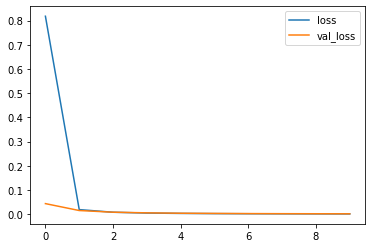

In [27]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

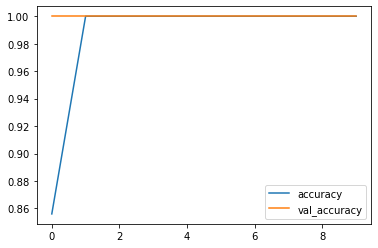

In [28]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [31]:
IDs=[]
Feature_vectors=[]
for key in all_classes:
    files = os.listdir("JPEGImages\\"+key)
    input_arr=[]

    for i in range(10):
        id= all_classes.index(key)
        IDs.append(id)
        image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+key+"\\"+files[i],grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
        input=tf.keras.preprocessing.image.img_to_array(image)
        input=input/255.0
        input_arr.append(input)
    if(len(input_arr)>0):
        input_model= np.array(input_arr)
        features= feature_extractor_model.predict(input_model)
        for vector in features:
            Feature_vectors.append(vector)  
    print(key)
    

1/1 [==============================] - 0s 32ms/step
antelope
1/1 [==============================] - 0s 28ms/step
bat
1/1 [==============================] - 0s 27ms/step
beaver
1/1 [==============================] - 0s 27ms/step
blue+whale
1/1 [==============================] - 0s 29ms/step
bobcat
1/1 [==============================] - 0s 29ms/step
buffalo
1/1 [==============================] - 0s 30ms/step
chihuahua
1/1 [==============================] - 0s 26ms/step
chimpanzee
1/1 [==============================] - 0s 26ms/step
collie
1/1 [==============================] - 0s 27ms/step
cow
1/1 [==============================] - 0s 41ms/step
dalmatian
1/1 [==============================] - 0s 28ms/step
deer
1/1 [==============================] - 0s 29ms/step
dolphin
1/1 [==============================] - 0s 27ms/step
elephant
1/1 [==============================] - 0s 27ms/step
fox
1/1 [==============================] - 0s 28ms/step
german+shepherd
1/1 [==============================] -

In [33]:
X= np.array(Feature_vectors)
print(X.shape)
y= classifier.predict(X)
print(y.shape)
count_correct=0
predicted_array=[]
truth_array=[]
for i in range(y.shape[0]):
    predicted= np.argmax( y[i])
    predicted_array.append(predicted)
    truth= IDs[i]
    truth_array.append(truth)
    if(predicted==truth):
        count_correct+=1
    print(all_classes[truth]+"---"+all_classes[predicted])
print(count_correct)

(500, 2048)
16/16 [==============================] - 0s 2ms/step
(500, 50)
antelope---antelope
antelope---antelope
antelope---antelope
antelope---antelope
antelope---antelope
antelope---antelope
antelope---antelope
antelope---antelope
antelope---antelope
antelope---antelope
bat---giant+panda
bat---bat
bat---bat
bat---hippopotamus
bat---pig
bat---bat
bat---bat
bat---beaver
bat---bat
bat---weasel
beaver---beaver
beaver---beaver
beaver---grizzly+bear
beaver---beaver
beaver---beaver
beaver---beaver
beaver---beaver
beaver---beaver
beaver---beaver
beaver---beaver
blue+whale---blue+whale
blue+whale---blue+whale
blue+whale---blue+whale
blue+whale---pig
blue+whale---seal
blue+whale---blue+whale
blue+whale---blue+whale
blue+whale---blue+whale
blue+whale---pig
blue+whale---blue+whale
bobcat---bobcat
bobcat---bobcat
bobcat---bobcat
bobcat---bobcat
bobcat---bobcat
bobcat---bobcat
bobcat---bobcat
bobcat---bobcat
bobcat---bobcat
bobcat---bobcat
buffalo---chimpanzee
buffalo---buffalo
buffalo---buffalo

In [45]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues, png_output=None, show=True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    # Calculate chart area size
    leftmargin = 0.5 # inches
    rightmargin = 0.5 # inches
    categorysize = 0.5 # inches
    figwidth = leftmargin + rightmargin + (len(classes) * categorysize)           

    f = plt.figure(figsize=(figwidth, figwidth))

    # Create an axes instance and ajust the subplot size
    ax = f.add_subplot(111)
    ax.set_aspect(1)
    f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=0.94, bottom=0.1)

    res = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)
    plt.colorbar(res)
    ax.set_xticks(range(len(classes)))
    ax.set_yticks(range(len(classes)))
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if png_output is not None:
        os.makedirs(png_output, exist_ok=True)
        f.savefig(os.path.join(png_output,'confusion_matrix.png'), bbox_inches='tight')

    if show:
        plt.show()
        plt.close(f)
    else:
        plt.close(f)

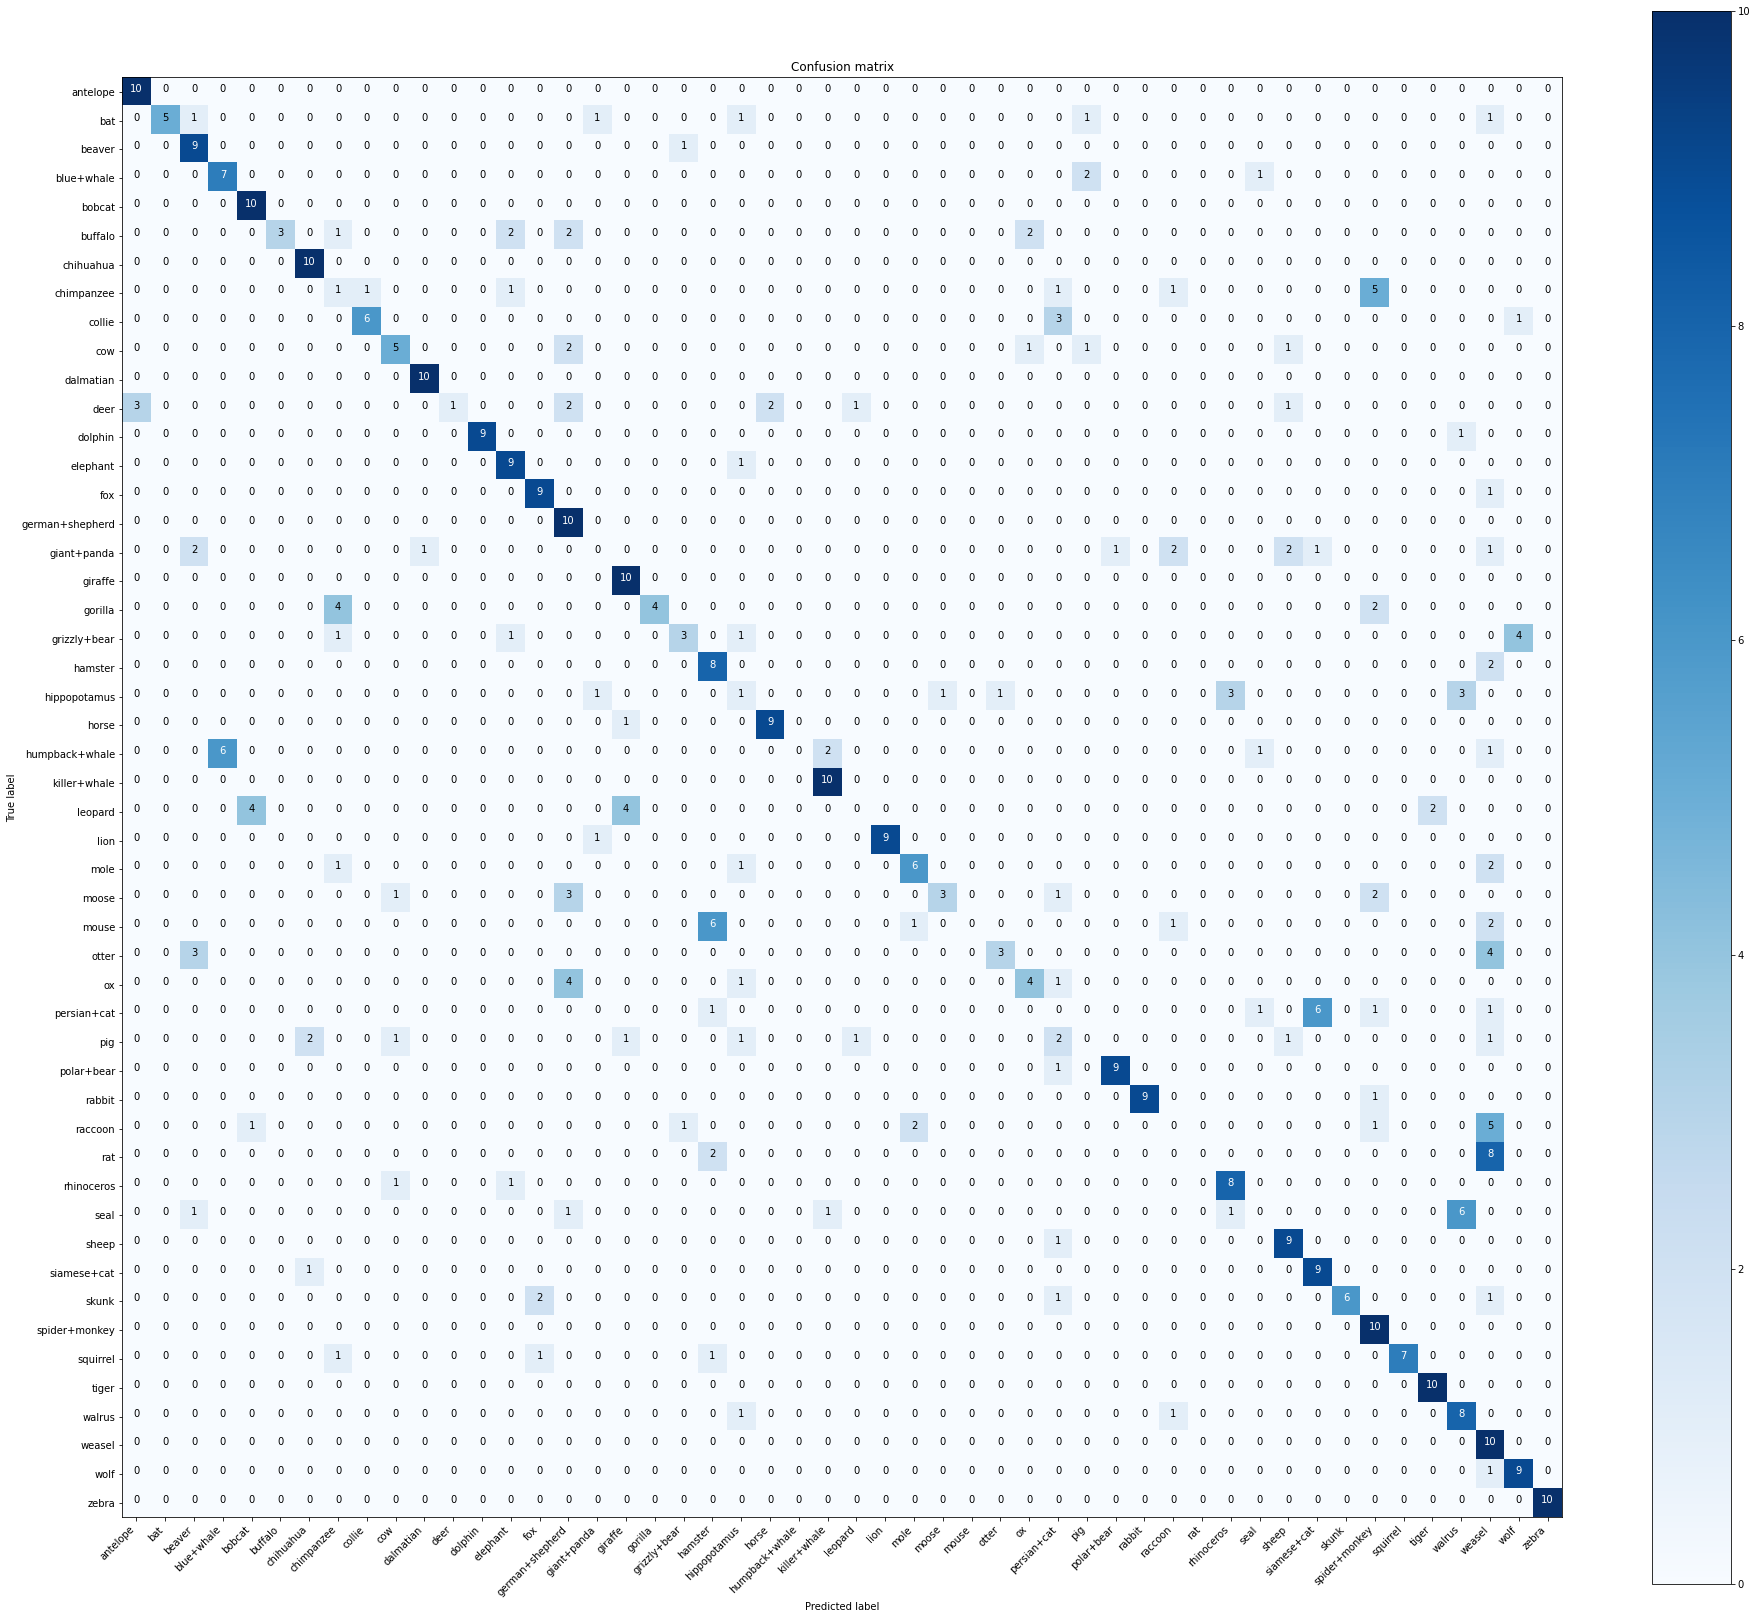

In [46]:
from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(truth_array,predicted_array)
plot_confusion_matrix(confusion_matrix,all_classes)
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = all_classes)

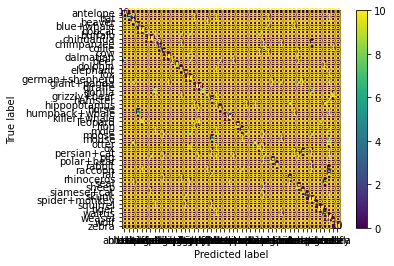

<Figure size 1440x1440 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.figure(figsize=(20,20))
plt.show()